# 🎬 Netflix Data Analysis Project

This project explores Netflix's content catalog using data analysis and visualization techniques. We aim to uncover content trends, popular genres, and patterns in release, duration, and regional preferences.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('Set2')

df = pd.read_csv('netflix_titles.csv')

movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
print("Dataset shape:", df.shape)

print("\nData Types:\n")
print(df.dtypes)

print("\nMissing Values:\n")
print(df.isnull().sum())

Dataset shape: (8807, 12)

Data Types:

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

Missing Values:

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [4]:
print("\nUnique Types:\n", df['type'].unique())

print("\nUnique Ratings:\n", df['rating'].unique())

print("\nNumber of Unique Countries:\n", df['country'].nunique())

print("\nNumber of Unique Genres (listed_in):\n", df['listed_in'].nunique())


Unique Types:
 ['Movie' 'TV Show']

Unique Ratings:
 ['PG-13' 'TV-MA' 'PG' 'TV-14' 'TV-PG' 'TV-Y' 'TV-Y7' 'R' 'TV-G' 'G'
 'NC-17' '74 min' '84 min' '66 min' 'NR' nan 'TV-Y7-FV' 'UR']

Number of Unique Countries:
 748

Number of Unique Genres (listed_in):
 514


In [5]:
invalid_ratings = df[df['rating'].str.contains('min', na=False)]
print(invalid_ratings[['title', 'rating', 'duration']])

                                     title  rating duration
5541                       Louis C.K. 2017  74 min      NaN
5794                 Louis C.K.: Hilarious  84 min      NaN
5813  Louis C.K.: Live at the Comedy Store  66 min      NaN


In [6]:
df = df[~df['rating'].str.contains('min', na=False)]

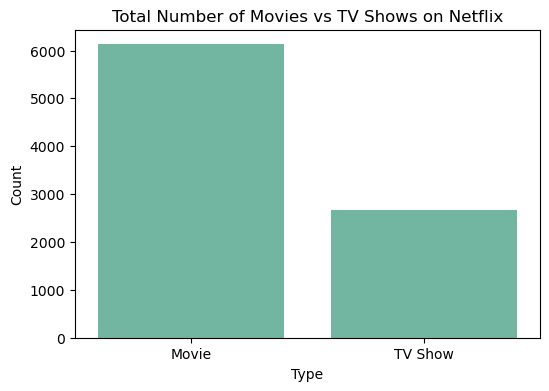

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type')
plt.title("Total Number of Movies vs TV Shows on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

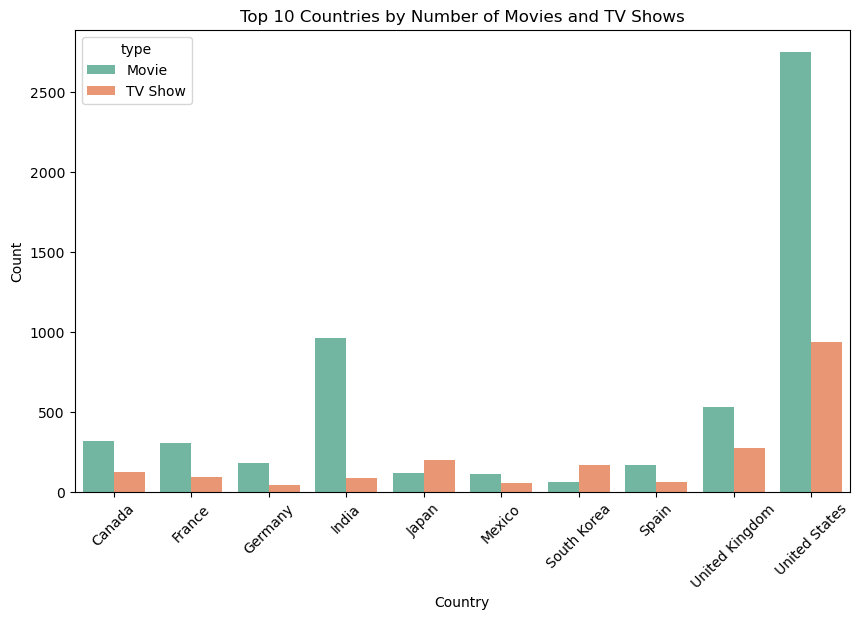

In [8]:
df_exploded = df.assign(country=df['country'].str.split(', ')).explode('country')

country_type = df_exploded.groupby(['country', 'type']).size().reset_index(name='count')

top_countries = country_type.groupby('country')['count'].sum().sort_values(ascending=False).head(10).index

top_country_type = country_type[country_type['country'].isin(top_countries)]

plt.figure(figsize=(10,6))
sns.barplot(data=top_country_type, x='country', y='count', hue='type', palette='Set2')
plt.title("Top 10 Countries by Number of Movies and TV Shows")
plt.xlabel("Country")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

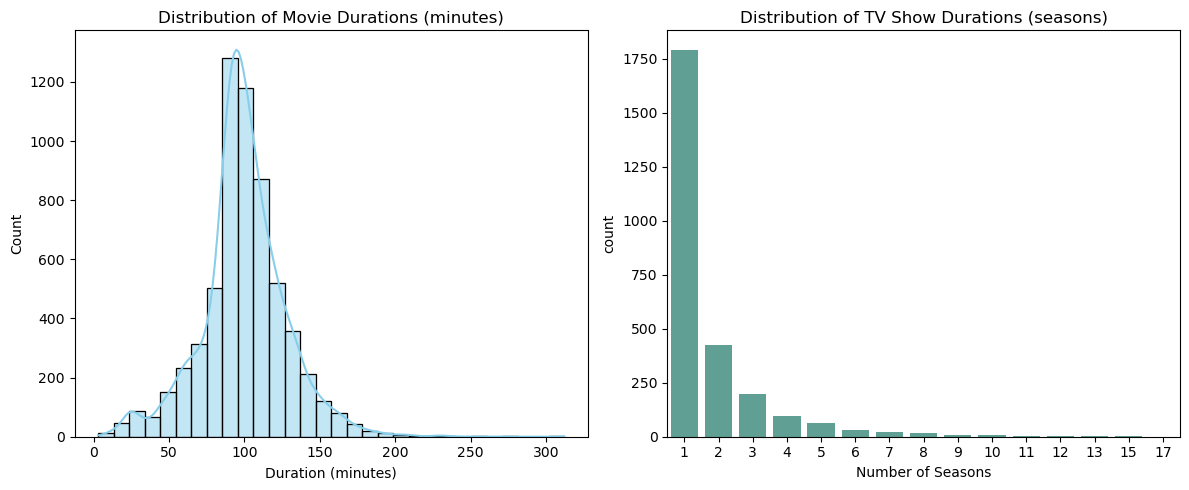

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

movies = df[df['type'] == 'Movie'].copy()
tv_shows = df[df['type'] == 'TV Show'].copy()

movies = movies[movies['duration'].notna()]
tv_shows = tv_shows[tv_shows['duration'].notna()]

movies['duration_int'] = movies['duration'].str.extract(r'(\d+)').astype(int)
tv_shows['duration_int'] = tv_shows['duration'].str.extract(r'(\d+)').astype(int)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(movies['duration_int'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Movie Durations (minutes)")
plt.xlabel("Duration (minutes)")

plt.subplot(1,2,2)
sns.countplot(x=tv_shows['duration_int'], color='#5A9')
plt.title("Distribution of TV Show Durations (seasons)")
plt.xlabel("Number of Seasons")

plt.tight_layout()
plt.show()

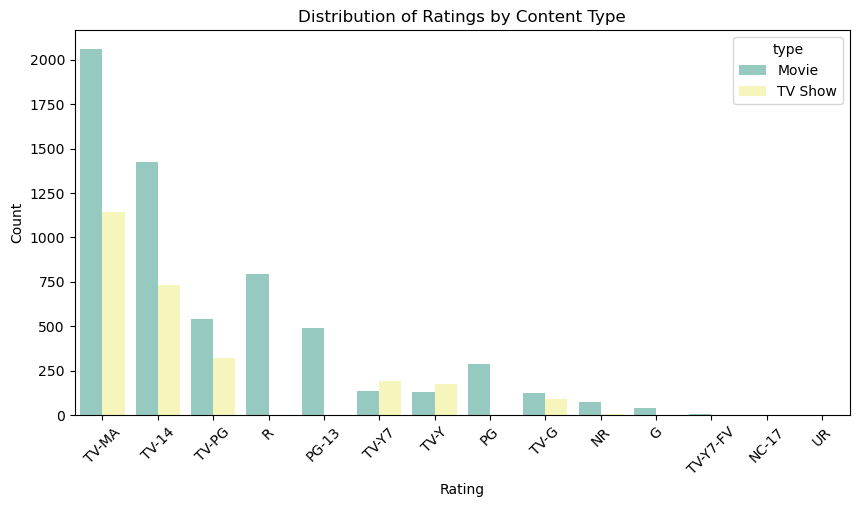

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='rating', hue='type', order=df['rating'].value_counts().index, palette='Set3')
plt.title("Distribution of Ratings by Content Type")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [18]:
print("Movie durations (minutes):")
print(movies['duration_int'].describe())

print("\nTV Show durations (seasons):")
print(tv_shows['duration_int'].describe())

Movie durations (minutes):
count    6128.000000
mean       99.577187
std        28.290593
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration_int, dtype: float64

TV Show durations (seasons):
count    2676.000000
mean        1.764948
std         1.582752
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        17.000000
Name: duration_int, dtype: float64


In [20]:
movies.groupby('rating')['duration_int'].mean().sort_values()

rating
TV-Y         48.114504
TV-Y7        66.287770
TV-Y7-FV     68.400000
TV-G         79.666667
G            90.268293
NR           94.533333
TV-PG        94.851852
TV-MA        95.889913
PG           98.282230
UR          106.333333
R           106.720201
PG-13       108.330612
TV-14       110.290820
NC-17       125.000000
Name: duration_int, dtype: float64

In [22]:
df['genres'] = df['listed_in'].str.split(',')

df_exploded = df.explode('genres')

df_exploded['genres'] = df_exploded['genres'].str.strip()

df_exploded.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genres
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",International TV Shows
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",TV Dramas
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",TV Mysteries
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Crime TV Shows


In [24]:
genre_counts = df_exploded.groupby(['type', 'genres']).size().reset_index(name='count')

genre_pivot = genre_counts.pivot(index='genres', columns='type', values='count').fillna(0)

genre_pivot['total'] = genre_pivot.sum(axis=1)
genre_pivot = genre_pivot.sort_values(by='total', ascending=False)

genre_pivot.head(10)

type,Movie,TV Show,total
genres,,,
International Movies,2752.0,0.0,2752.0
Dramas,2427.0,0.0,2427.0
Comedies,1674.0,0.0,1674.0
International TV Shows,0.0,1351.0,1351.0
Documentaries,869.0,0.0,869.0
Action & Adventure,859.0,0.0,859.0
TV Dramas,0.0,763.0,763.0
Independent Movies,756.0,0.0,756.0
Children & Family Movies,641.0,0.0,641.0


In [ ]:
top_genres = genre_pivot.head(10)

top_genres[['Movie', 'TV Show']].plot(kind='bar', figsize=(12,6), color=['#ff9999','#66b3ff'])
plt.title('Top 10 Netflix Genres: Movies vs TV Shows')
plt.ylabel('Number of Titles')
plt.xlabel('Genres')
plt.xticks(rotation=45)
plt.show()

In [26]:
df['country_list'] = df['country'].str.split(',')

df_countries = df.explode('country_list')

df_countries['country_list'] = df_countries['country_list'].str.strip()

df_countries['genres'] = df_countries['listed_in'].str.split(',')
df_countries = df_countries.explode('genres')
df_countries['genres'] = df_countries['genres'].str.strip()

df_countries.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genres,country_list
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Documentaries,United States
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",International TV Shows,South Africa
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",TV Dramas,South Africa
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",TV Mysteries,South Africa
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Crime TV Shows,NaN


In [28]:
country_genre_counts = df_countries.groupby(['country_list', 'genres']).size().reset_index(name='count')

top_countries = df_countries['country_list'].value_counts().head(10).index.tolist()

country_genre_top = country_genre_counts[country_genre_counts['country_list'].isin(top_countries)]

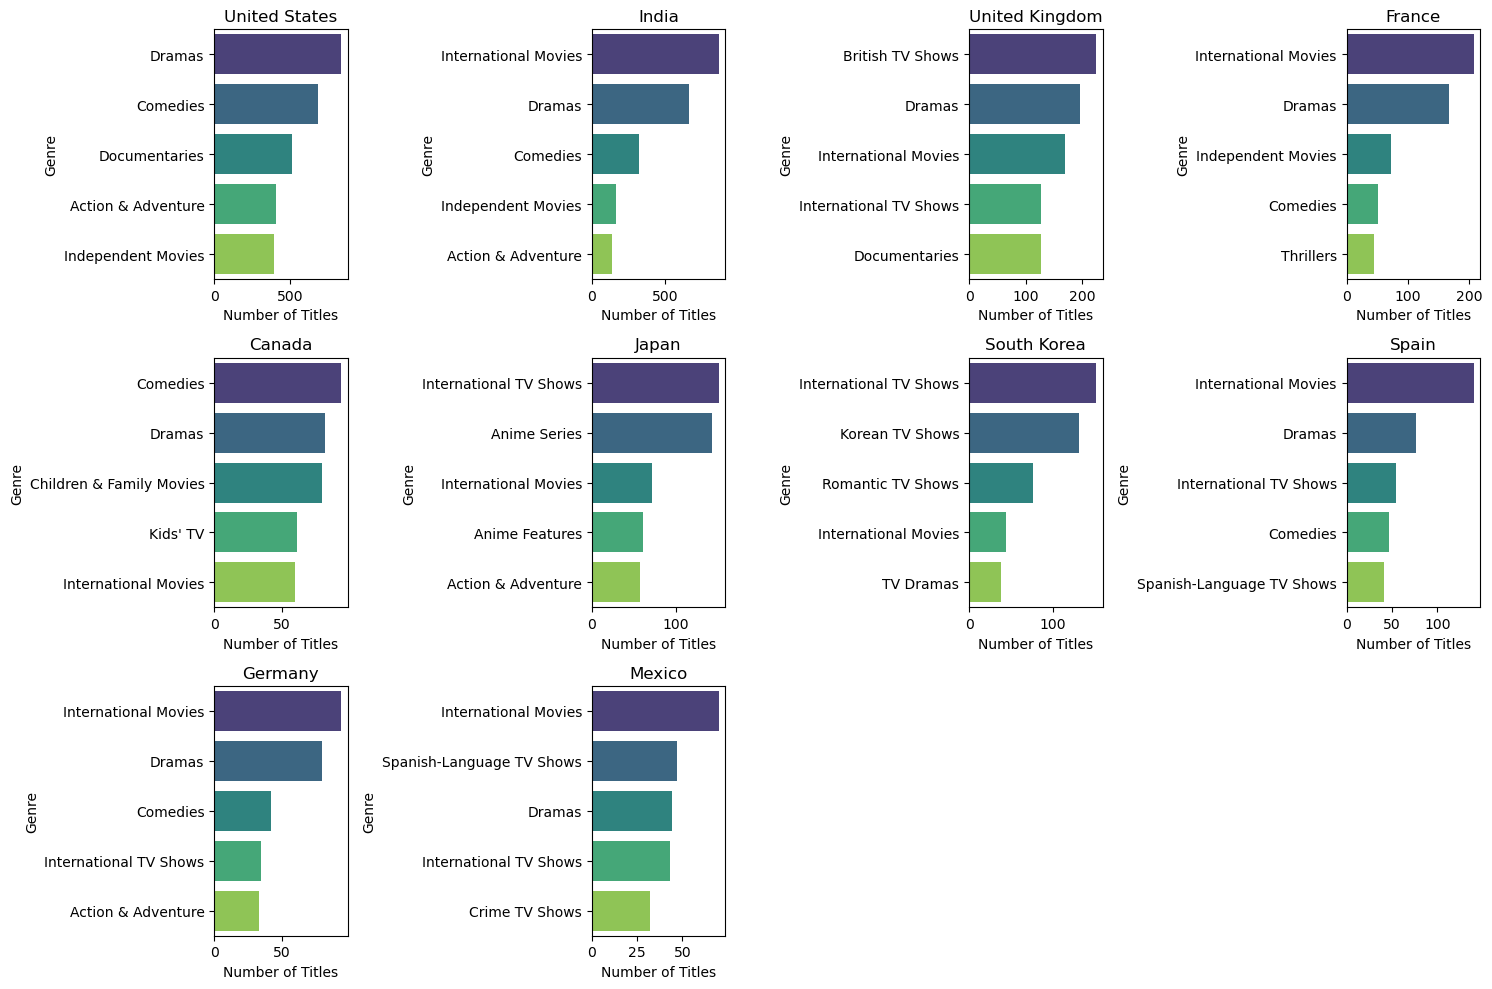

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
for i, country in enumerate(top_countries):
    plt.subplot(3, 4, i+1)
    data = country_genre_top[country_genre_top['country_list'] == country].sort_values('count', ascending=False).head(5)
    sns.barplot(data=data, x='count', y='genres', hue='genres', palette='viridis', dodge=False, legend=False)
    plt.title(country)
    plt.xlabel('Number of Titles')
    plt.ylabel('Genre')

plt.tight_layout()
plt.show()

In [34]:
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')

directors = df['director'].str.split(', ').explode()

actors = df['cast'].str.split(', ').explode()

In [36]:
top_directors = directors.value_counts().head(10)
print("Top 10 Directors:\n", top_directors)

top_actors = actors.value_counts().head(10)
print("\nTop 10 Actors:\n", top_actors)

Top 10 Directors:
 director
Unknown                2634
Rajiv Chilaka            22
Jan Suter                21
Raúl Campos              19
Suhas Kadav              16
Marcus Raboy             16
Jay Karas                15
Cathy Garcia-Molina      13
Martin Scorsese          12
Youssef Chahine          12
Name: count, dtype: int64

Top 10 Actors:
 cast
Unknown             825
Anupam Kher          43
Shah Rukh Khan       35
Julie Tejwani        33
Takahiro Sakurai     32
Naseeruddin Shah     32
Rupa Bhimani         31
Om Puri              30
Akshay Kumar         30
Yuki Kaji            29
Name: count, dtype: int64


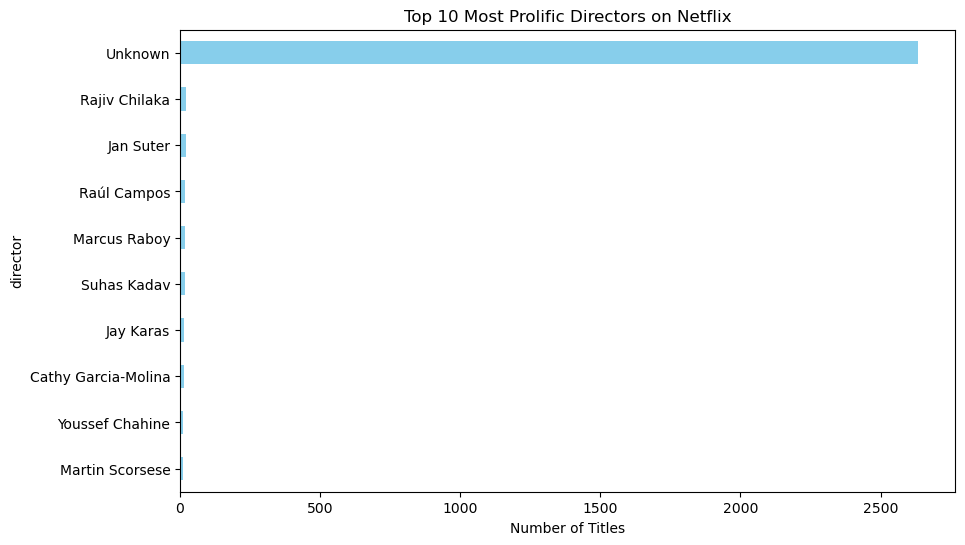

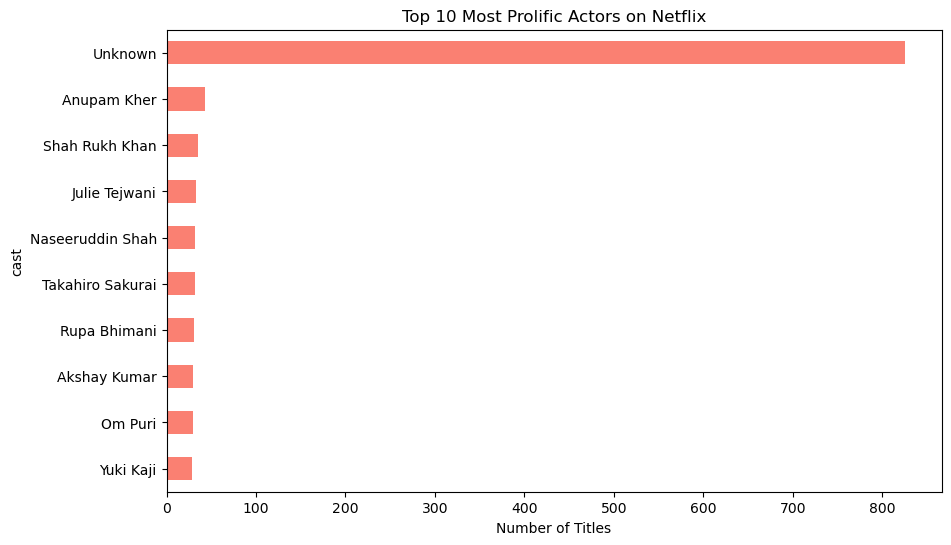

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
top_directors.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 10 Most Prolific Directors on Netflix')
plt.xlabel('Number of Titles')
plt.show()

plt.figure(figsize=(10,6))
top_actors.sort_values().plot(kind='barh', color='salmon')
plt.title('Top 10 Most Prolific Actors on Netflix')
plt.xlabel('Number of Titles')
plt.show()

## 📘 Conclusion

In this project, I performed an in-depth data analysis of Netflix's content catalog using the Netflix dataset. I applied data preprocessing, exploratory data analysis (EDA), and multiple visualizations to uncover insights.

### 🔍 Key Findings:
- **Content Type**: Netflix primarily features Movies over TV Shows.
- **Genres**: Drama, Comedy, and Documentaries are the most common genres.
- **Ratings**: Most content is rated for mature audiences (TV-MA, TV-14).
- **Country Distribution**: The majority of content comes from the USA and India, but global representation is growing.
- **Duration**: Most movies last between 90–120 minutes, and most shows have 1–2 seasons.
- **Popular People**: A few directors and actors appear frequently in the catalog.
- **Regional Trends**: Genre preferences vary significantly by country.

### 📈 Recommendations:
- Netflix can expand in underrepresented genres and countries.
- Content for younger audiences may be a potential growth area.
- Regional genre preferences can guide localized content strategies.

---

This analysis helps understand what types of content perform well, where gaps lie, and how Netflix can align with audience demand.
